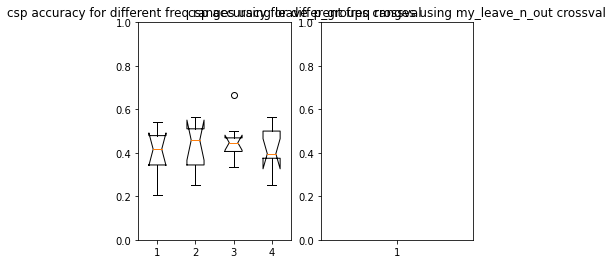

In [16]:
import sys
import matplotlib.pyplot as plt
import pickle
import mne
import xgboost as xgb
from sklearn.metrics import accuracy_score
sys.path.append("..")
from utils.csp_example import custom_CSP, LDA, Pipeline
from utils.features_utils import CSP_LDA_features, block_crossval

csp_decoder = custom_CSP(n_components=4, log=True,
                         cov_kwargs={'method': 'ledoit_wolf'})

model = Pipeline(steps=[('spatial_filtering', csp_decoder),
                        ('decoder', LDA())])

#exps = [str(n) for n in range(3, 11)]
exps = ["1"]

for exp in exps:
    #epochs = mne.read_epochs("data/VP" + exp + "_epo.fif").crop(0, 6)
    #ica_model = mne.preprocessing.read_ica("data/VP" + exp + "_ica.fif")

    bscores_lng = []
    bscores_lno = []

    search_range = range(128,132,1) #range(5, 35, 2)

    with open('results/csp_' + exp + '_lng_acc.pickle', 'rb') as handle:
        bscores_lng = pickle.load( handle)
    with open('results/csp_' + exp + '_lno_acc.pickle', 'rb') as handle:
        bscores_lng = pickle.load( handle)

fig, axs = plt.subplots(1,2)
axs[0].boxplot(bscores_lng,[str(n)+ " " + str(n+2) for n in search_range], )
axs[0].set_title("csp accuracy for different freq ranges using leave_p_groups crossval")
axs[0].set_ylim(0,1)
axs[1].boxplot(bscores_lno,[str(n)+ " " + str(n+2) for n in search_range])
axs[1].set_title("csp accuracy for different freq ranges using my_leave_n_out crossval")
axs[1].set_ylim(0,1)
plt.show()


In [13]:
import sys
import matplotlib.pyplot as plt
import pickle
import mne
import xgboost as xgb

In [14]:
mne.read_epochs("data/VP8_300hz_epo.fif").info['ch_names']


Reading /home/tidiane/dev/bsd_lab/psid/data/VP8_300hz_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7503.33 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'FC1',
 'FC2',
 'CP1',
 'CP2',
 'FC5',
 'FC6',
 'CP5',
 'CP6',
 'F9',
 'F10',
 'P9',
 'P10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'FT7',
 'FC3',
 'FCz',
 'FC4',
 'FT8',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO5',
 'POz',
 'PO6',
 'PO8',
 'Oz',
 'EOGvu',
 'x_EMG1',
 'x_EMG2',
 'x_EMG3',
 'x_EMG4',
 'x_resp',
 'x_pulse',
 'dist_t_n',
 'pos_t_x',
 'pos_t_y',
 'speed_t_x',
 'speed_t_y',
 'accel_t_x',
 'accel_t_y',
 'jerk_t_x',
 'jerk_t_y',
 'blk_idx',
 'trial_nbr',
 'stim']

In [15]:
len(mne.read_epochs("data/VP8_epo.fif").pick_types(eeg=True).info['ch_names'])

Reading /home/tidiane/dev/bsd_lab/psid/data/VP8_epo.fif ...
    Found the data of interest:
        t =   -2000.00 ...    7503.33 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


63